**Import packages**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Generate dataset**

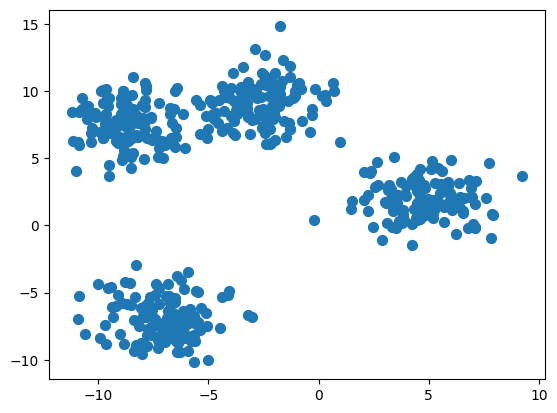

In [29]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=1.5, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
print(X[0])
print(len(X))

[-7.11441777  6.26875828]
500


In [4]:
y_true

array([3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

**K-Means from scratch**

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def kmeans(X, num_clusters, seed=42, verbose=False):
    rng = np.random.RandomState(seed)

    # Randomly choose N center points
    i = rng.permutation(X.shape[0])[:num_clusters]
    current_centers = X[i]
    print(current_centers)

    count = 0
    while True:
        # Assign labels for all points to closest centers
        closest_neighbor_labels_to_centers = pairwise_distances_argmin(X, current_centers)
        if verbose:
            print(closest_neighbor_labels_to_centers)

        # Find new center (mean) of all points with same label
        mean_of_labels_points = [X[closest_neighbor_labels_to_centers == i].mean(0) for i in range(num_clusters)]
        new_centers = np.array(mean_of_labels_points)
        if verbose:
            print(new_centers)

        # Break loop if new centers aren't changing anymore
        if np.all(current_centers == new_centers):
            break
        else:
            current_centers = new_centers
            count += 1

    if verbose:
        print(f"Took {count} iterations to converge!")
    return current_centers, closest_neighbor_labels_to_centers

centers, labels = kmeans(X, 4, verbose=True)

[[-3.32577171  9.18067001]
 [-8.64617113  6.30194543]
 [-9.7017845   7.50653764]
 [-9.16977402  7.36385167]]
[1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 2 3 0 0 0 0 1 2 1 1 3 3 0 1 0 0 0 1 1 0
 0 3 1 1 0 0 0 0 0 0 0 1 2 1 0 2 1 0 0 0 2 1 2 2 0 1 1 0 1 1 1 0 1 0 1 1 1
 0 2 0 1 0 0 1 0 1 0 2 2 2 3 0 0 3 1 0 1 0 1 0 0 0 1 0 0 0 2 1 0 0 1 0 3 1
 2 3 1 3 1 0 3 1 1 0 0 1 0 0 0 0 1 1 1 3 0 0 1 0 3 3 3 0 0 1 1 0 0 1 2 2 0
 0 0 1 1 0 0 0 3 0 1 1 1 0 3 0 0 1 0 0 1 2 2 1 0 0 3 1 0 0 1 1 1 0 3 0 0 1
 2 0 0 0 1 1 3 1 1 0 1 0 0 2 1 0 0 1 3 0 1 1 0 0 3 1 1 1 0 0 1 0 1 0 0 0 0
 2 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 3 1 0 0 0 1 0 0 0 0 0 0 3 0 1
 0 0 0 2 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 3 1 0 0 0 0 1 0 0 3 0 1 1 0 0 0 2 0
 1 0 1 0 1 3 0 0 0 0 1 1 0 0 1 3 0 0 0 1 3 0 0 0 3 0 0 3 3 1 1 2 2 1 3 1 0
 3 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 3 2 1 2 0 1 0 0 0 1 1 1 0 1 0 0 3
 0 1 0 1 2 0 1 0 3 2 1 0 0 1 2 1 0 1 3 1 3 0 0 0 1 1 0 0 0 0 0 3 1 0 0 0 1
 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 2 1 0 0 1 1 0 0 0 1 1 1 3 1 0 0 0 0

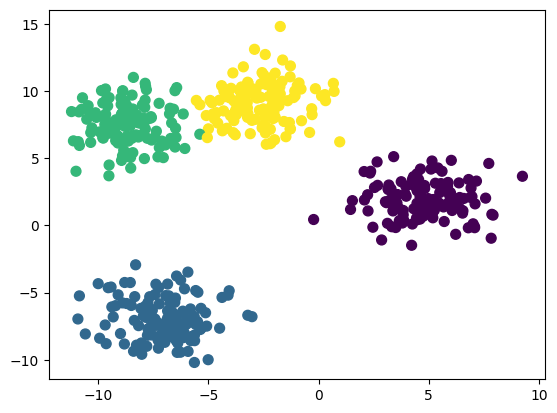

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

[[-3.32577171  9.18067001]
 [-8.64617113  6.30194543]
 [-9.7017845   7.50653764]]


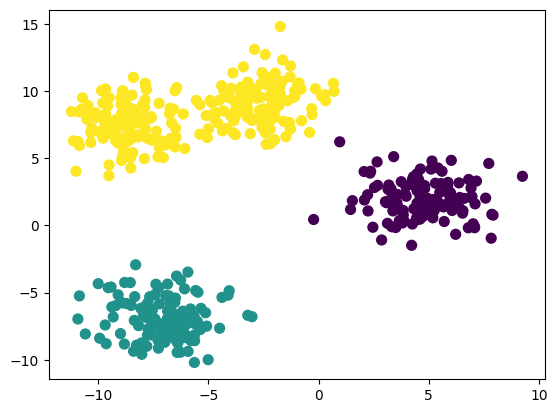

In [7]:
centers, labels = kmeans(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

[[-7.22788013  5.78374997]
 [ 6.37704515  3.16066372]
 [-7.76821808 -8.17609575]
 [-6.52620535 -5.7238118 ]]


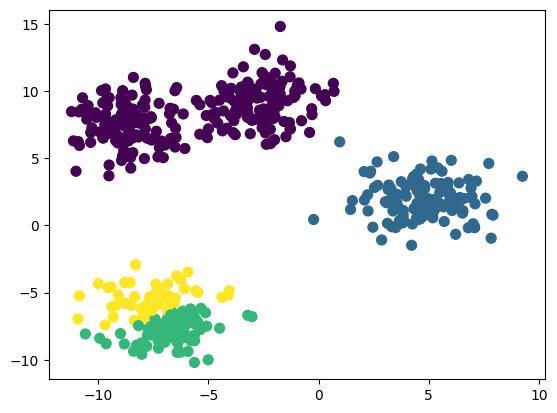

In [8]:
centers, labels = kmeans(X, 4, seed=1334)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

[[-6.51706995 10.01733943]
 [-2.11937343 10.18702044]
 [-6.79603982 -5.23882232]
 [ 0.28946414  9.72503551]]


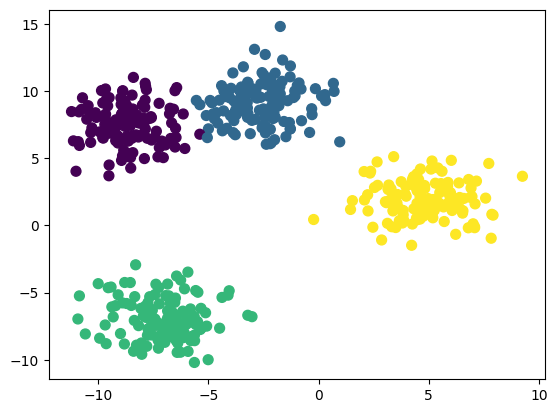

In [9]:
centers, labels = kmeans(X, 4, seed=1337)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Clustering Quality Metrics**

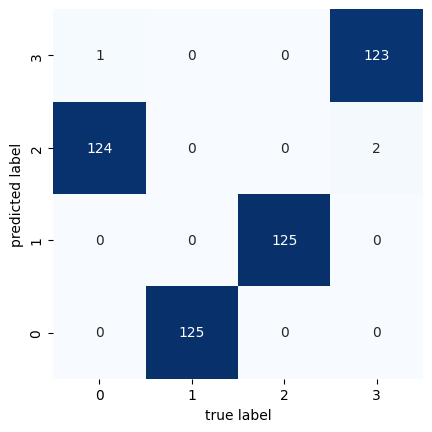

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', yticklabels=[3,2,1,0])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
y_true

array([3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

In [12]:
labels

array([0, 2, 3, 1, 2, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 0, 0, 1, 3, 1,
       3, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 3, 3, 0, 0, 2, 3, 1, 1,
       1, 3, 3, 3, 2, 0, 2, 1, 0, 2, 3, 1, 1, 0, 2, 0, 0, 1, 2, 0, 3, 2,
       2, 0, 3, 2, 3, 2, 2, 0, 1, 0, 1, 2, 3, 1, 2, 3, 2, 1, 0, 0, 0, 0,
       3, 1, 0, 2, 3, 2, 3, 0, 1, 3, 1, 0, 3, 3, 3, 0, 0, 1, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 2, 3, 0, 2, 2, 1, 3, 2, 3, 0, 3, 3, 2, 2, 0, 0, 3,
       3, 2, 3, 0, 0, 0, 3, 3, 2, 0, 3, 3, 2, 0, 0, 1, 1, 1, 2, 2, 3, 3,
       1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2, 1, 3, 2, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 3, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1,
       0, 2, 1, 1, 2, 0, 3, 0, 2, 3, 3, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 3,
       3, 1, 0, 1, 3, 1, 1, 2, 2, 3, 2, 3, 1, 2, 0, 2, 1, 2, 3, 3, 3, 2,
       1, 3, 0, 0, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 0, 1, 2, 3, 1, 1, 0, 1,
       2, 2, 3, 1, 3, 2, 1, 1, 3, 0, 1, 1, 1, 3, 0, 2, 1, 3, 3, 1, 2, 1,
       3, 0, 3, 2, 2, 1, 1, 3, 0, 3, 0, 3, 2, 3, 2,

In [13]:
# Fixup labels
for index, item in np.ndenumerate(labels):
    if item == 0:
        labels[index] = 3
    elif item == 1:
        labels[index] = 0
    elif item == 3:
        labels[index] = 1

In [14]:
y_true

array([3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

In [15]:
labels

array([3, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

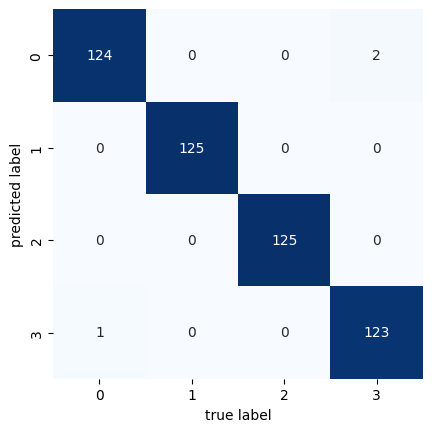

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

0.994